In [36]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import contractions
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

Data preprocessing

In [37]:

def small(data):
    return data.lower()
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
def cleaning_contractions(text):
    text=text.split()
    corrected=[]
    for word in text:
        corrected.append(contractions.fix(word))
    return " ".join(corrected)
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    return re.sub(re.compile("["+punctuations_list+"‼️’]")," ",text)
stop_words = stopwords.words('english')
def cleaning_stopwords(data):
    words = data.split()
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text


In [38]:
df=pd.read_csv("..\\dataset\\cyberattacks.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   attack   220 non-null    object
 1   phrases  220 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [53]:
attack_keys=df.attack.unique()
print(attack_keys)
attackwords=dict()

['phishing' 'Spear Phishing' 'Malware Distribution' 'Ransomware Attacks'
 'Business Email Compromise' 'Email Spoofing' 'Credential Theft'
 'SMS Phishing' 'Instant Messaging Malware Distribution'
 'Social Engineering' 'Message Spoofing for Phishing']


In [46]:
tempset=set()
dftemp=df[df.attack=="phishing"]
for i in range(20):
    tempset.add(dftemp.iloc[i,1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   attack   20 non-null     object
 1   phrases  20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes
None


In [45]:
tempset

{'Access your prize by clicking the link.',
 'Account compromise alert - log in to secure your data.',
 'Confirm your personal information to prevent a lockout.',
 "Congratulations, you've won a prize! Click here to claim.",
 'Immediate action required - verify your account.',
 'Important security update - please log in.',
 'Please update your personal information immediately.',
 'Review and update your account information.',
 'Suspicious activity detected in your account.',
 'Suspicious login attempt - confirm your identity.',
 'Unlock your account by confirming your credentials.',
 'Urgent account verification - please click to proceed.',
 'Urgent message from your bank - action required.',
 'Verify your account information now.',
 "You've been selected for an exclusive offer - act now.",
 'Your account has been suspended - verify your details.',
 'Your account needs immediate attention - click to resolve.',
 'Your account status is in jeopardy - confirm now.',
 'Your email account i

In [30]:
cleanedinputs=[]# stores the cleaned data
wordmap=dict()
for i in tempset:
    temp=small(i)
    temp=cleaning_numbers(temp)
    temp=cleaning_contractions(temp)
    temp=cleaning_punctuations(temp)
    temp=cleaning_stopwords(temp)
    if temp!="":
        cleanedinputs.append(temp)
        keys=set(wordmap.keys())
        for j in temp.split():
            if j not in keys:
                wordmap[j]=[i]
            else:
                wordmap[j].append(i) #mapping the maps to their sentences

In [31]:
for k,v in wordmap.items():
    print(k,":",v)

account : ['Your account has been suspended - verify your details.', 'Immediate action required - verify your account.', 'Account compromise alert - log in to secure your data.', 'Your account status is in jeopardy - confirm now.', 'Review and update your account information.', 'Your email account is at risk - verify your information.', 'Suspicious activity detected in your account.', 'Unlock your account by confirming your credentials.', 'Verify your account information now.', 'Your account needs immediate attention - click to resolve.', 'Urgent account verification - please click to proceed.']
suspended : ['Your account has been suspended - verify your details.']
verify : ['Your account has been suspended - verify your details.', 'Immediate action required - verify your account.', 'Your email account is at risk - verify your information.', 'Verify your account information now.']
details : ['Your account has been suspended - verify your details.']
immediate : ['Immediate action requir

In [33]:
words=[]
for i in cleanedinputs:
    words.extend(i.split())
#print(words)
phishing=Counter(words) #counting occurance of each word using counter class
print(phishing)

Counter({'account': 11, 'information': 5, 'verify': 4, 'click': 4, 'log': 3, 'confirm': 3, 'update': 3, 'please': 3, 'immediate': 2, 'action': 2, 'required': 2, 'login': 2, 'prize': 2, 'personal': 2, 'suspicious': 2, 'urgent': 2, 'suspended': 1, 'details': 1, 'compromise': 1, 'alert': 1, 'secure': 1, 'data': 1, 'status': 1, 'jeopardy': 1, 'session': 1, 'expired': 1, 'review': 1, 'important': 1, 'security': 1, 'access': 1, 'clicking': 1, 'link': 1, 'email': 1, 'risk': 1, 'prevent': 1, 'lockout': 1, 'activity': 1, 'detected': 1, 'unlock': 1, 'confirming': 1, 'credentials': 1, 'needs': 1, 'attention': 1, 'resolve': 1, 'immediately': 1, 'congratulations': 1, 'claim': 1, 'verification': 1, 'proceed': 1, 'attempt': 1, 'identity': 1, 'selected': 1, 'exclusive': 1, 'offer': 1, 'act': 1, 'message': 1, 'bank': 1})


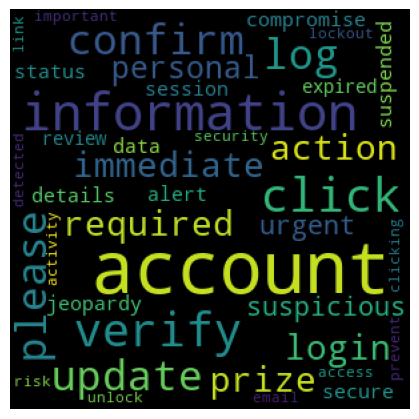

In [35]:
comment_words = " ".join(words)+ " "
#print(comment_words)
wordcloud = WordCloud(width = 300, height = 300,background_color ='black',min_font_size = 10).generate(comment_words)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

generating dictionary of the most occuring words of each attack

PHISHING
account : 11
information : 5
verify : 4
click : 4
log : 3
confirm : 3
update : 3
please : 3
immediate : 2
action : 2
required : 2
login : 2
prize : 2
personal : 2
suspicious : 2
urgent : 2
suspended : 1
details : 1
compromise : 1
alert : 1
secure : 1
data : 1
status : 1
jeopardy : 1
session : 1
expired : 1
review : 1
important : 1
security : 1
access : 1
clicking : 1
link : 1
email : 1
risk : 1
prevent : 1
lockout : 1
activity : 1
detected : 1
unlock : 1
confirming : 1
credentials : 1
needs : 1
attention : 1
resolve : 1
immediately : 1
congratulations : 1
claim : 1
verification : 1
proceed : 1
attempt : 1
identity : 1
selected : 1
exclusive : 1
offer : 1
act : 1
message : 1
bank : 1


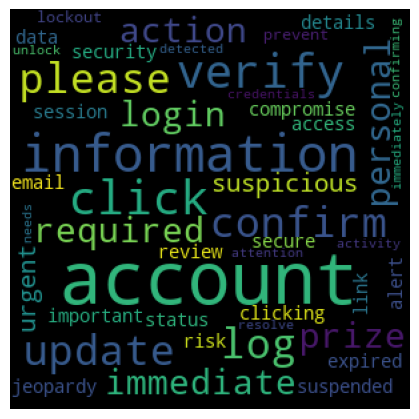

SPEAR PHISHING
please : 10
reply : 4
financial : 3
update : 3
confirm : 3
sensitive : 3
needed : 2
project : 2
acknowledge : 2
receipt : 2
document : 2
review : 2
request : 2
wire : 2
urgent : 2
need : 2
matter : 2
meeting : 2
message : 2
upcoming : 2
details : 2
confidential : 2
respond : 2
employee : 2
confirmation : 1
critical : 1
figures : 1
email : 1
important : 1
hr : 1
sign : 1
transfer : 1
immediately : 1
assistance : 1
follow : 1
kindly : 1
executive : 1
decision : 1
merger : 1
proposal : 1
eyes : 1
verify : 1
company : 1
compliance : 1
audit : 1
response : 1
action : 1
required : 1
agenda : 1
board : 1
discussion : 1
business : 1
opportunity : 1
contact : 1
legal : 1
benefits : 1
promptly : 1
requires : 1
immediate : 1
attention : 1
payroll : 1
client : 1
information : 1
help : 1
funds : 1
today : 1


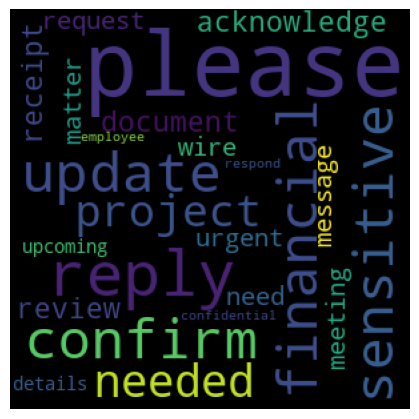

MALWARE DISTRIBUTION
attached : 9
open : 7
please : 5
file : 4
document : 4
opening : 3
attachment : 3
important : 3
download : 3
access : 3
review : 3
e : 2
message : 2
click : 2
read : 2
details : 2
card : 1
friend : 1
see : 1
track : 1
package : 1
software : 1
update : 1
ready : 1
install : 1
information : 1
photo : 1
album : 1
recent : 1
event : 1
resume : 1
job : 1
application : 1
flight : 1
view : 1
itinerary : 1
records : 1
account : 1
statement : 1
prize : 1
payment : 1
receipt : 1
confirm : 1
notice : 1
secure : 1
contract : 1
requested : 1
soon : 1
possible : 1
invoice : 1
process : 1
check : 1
pdf : 1
latest : 1
company : 1
report : 1
urgent : 1
ceo : 1
gift : 1
voucher : 1
ticket : 1
scan : 1
results : 1
respond : 1


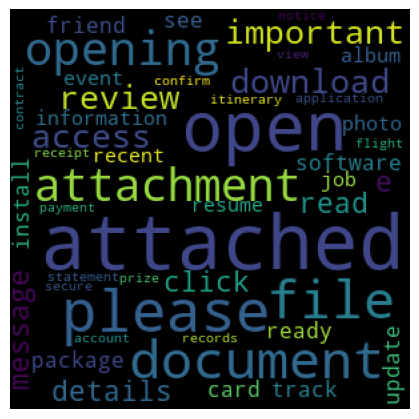

RANSOMWARE ATTACKS
pay : 9
data : 7
payment : 7
ransom : 6
files : 6
send : 4
access : 4
encrypted : 3
regain : 3
control : 3
compromised : 3
make : 3
breach : 2
recover : 2
urgent : 2
documents : 2
system : 2
decryption : 2
decrypt : 2
bitcoin : 2
instructions : 2
time : 1
running : 1
lose : 1
unlock : 1
important : 1
locked : 1
inaccessible : 1
hijacked : 1
release : 1
ransomware : 1
infection : 1
follow : 1
restricted : 1


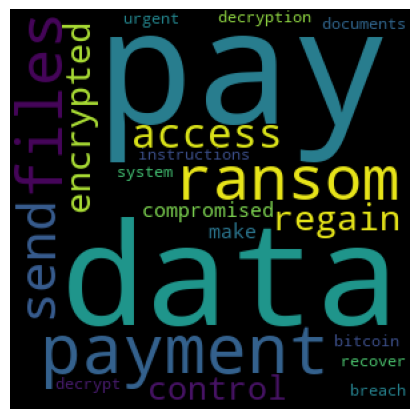

BUSINESS EMAIL COMPROMISE
please : 12
payment : 9
request : 6
confirm : 6
urgent : 4
wire : 4
transfer : 4
financial : 3
needed : 3
action : 3
instructions : 3
update : 3
act : 3
details : 3
acknowledge : 3
ceo : 2
initiate : 2
important : 2
invoice : 2
matter : 2
verify : 2
proceed : 2
transaction : 2
required : 2
assistance : 1
prompt : 1
response : 1
supplier : 1
quickly : 1
avoid : 1
delays : 1
change : 1
promptly : 1
changes : 1
method : 1
comply : 1
vendor : 1
adjustment : 1
critical : 1
send : 1
modification : 1
funds : 1
immediate : 1
revised : 1
swiftly : 1
confidential : 1
respond : 1
urgently : 1
process : 1
immediately : 1


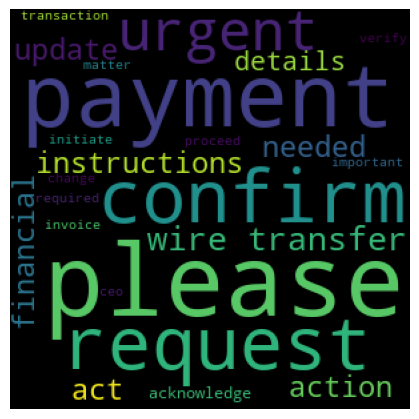

EMAIL SPOOFING
click : 7
open : 5
shared : 4
message : 4
friend : 3
important : 3
read : 3
sent : 3
document : 3
coworker : 2
trusted : 2
family : 2
member : 2
colleague : 2
view : 2
link : 2
attachment : 2
photo : 1
see : 1
update : 1
manager : 1
urgent : 1
voicemail : 1
source : 1
listen : 1
file : 1
received : 1
service : 1
provider : 1
verify : 1
account : 1
secure : 1
bank : 1
log : 1
video : 1
contact : 1
boss : 1
access : 1


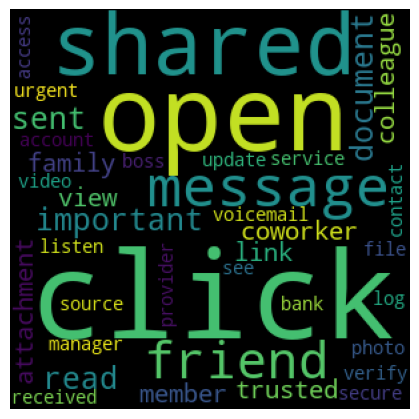

CREDENTIAL THEFT
account : 9
login : 7
confirm : 6
password : 5
access : 5
please : 5
identity : 4
verify : 3
reset : 3
action : 3
required : 3
credentials : 3
unauthorized : 2
detected : 2
protect : 2
security : 2
update : 2
information : 2
denied : 2
compromised : 2
details : 2
immediate : 2
locked : 2
needs : 1
updated : 1
notice : 1
breach : 1
try : 1
changed : 1
temporarily : 1
incorrect : 1
session : 1
expired : 1
log : 1
verification : 1
suspicious : 1
attempt : 1
restricted : 1
validate : 1
email : 1
risk : 1
respond : 1


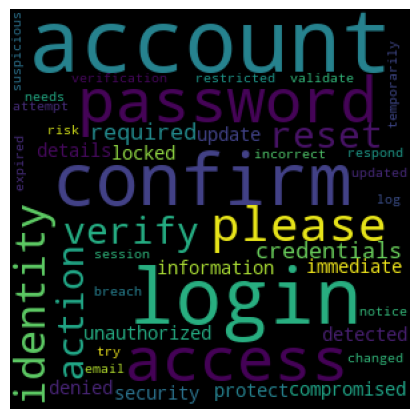

SMS PHISHING
account : 8
update : 4
login : 3
access : 3
link : 3
identity : 3
verification : 2
needed : 2
information : 2
avoid : 2
number : 2
click : 2
verify : 2
bank : 2
call : 2
claim : 2
activity : 2
detected : 2
confirm : 2
mandatory : 1
continue : 1
using : 1
services : 1
payment : 1
service : 1
interruption : 1
unlock : 1
verifying : 1
mobile : 1
email : 1
compromised : 1
reactivate : 1
exclusive : 1
content : 1
urgent : 1
security : 1
unauthorized : 1
attempt : 1
important : 1
message : 1
congratulations : 1
gift : 1
card : 1
unusual : 1
restricted : 1
resolve : 1
package : 1
delivery : 1
delayed : 1
address : 1
suspicious : 1
lottery : 1
winnings : 1
review : 1
personal : 1
password : 1
expired : 1
reset : 1
suspension : 1
invoice : 1
clicking : 1
provided : 1
locked : 1
action : 1
required : 1


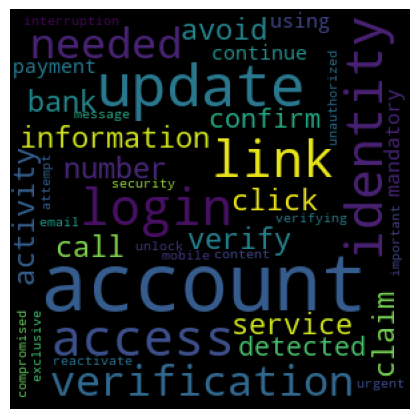

INSTANT MESSAGING MALWARE DISTRIBUTION
download : 6
clicking : 6
link : 6
access : 4
e : 3
click : 3
exclusive : 3
open : 3
get : 2
latest : 2
app : 2
update : 2
features : 2
video : 2
document : 2
view : 2
event : 2
ready : 2
book : 1
claim : 1
discount : 1
coupon : 1
newest : 1
check : 1
funny : 1
must : 1
see : 1
file : 1
content : 1
agenda : 1
prize : 1
provided : 1
music : 1
track : 1
voucher : 1
ticket : 1
upcoming : 1
private : 1
message : 1
viewing : 1
wallpaper : 1
gift : 1
card : 1
unlock : 1
premium : 1
software : 1
device : 1
photos : 1
recent : 1
attachment : 1
detailed : 1
instructions : 1
invitation : 1
watch : 1
important : 1
information : 1


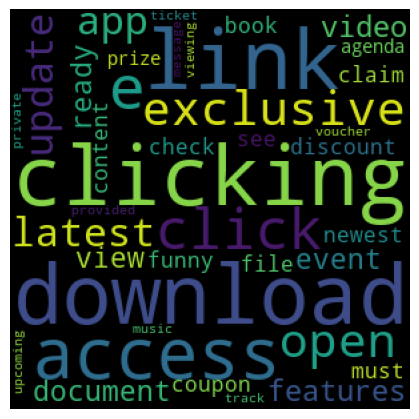

SOCIAL ENGINEERING
send : 8
money : 7
need : 5
help : 5
financial : 4
name : 4
transfer : 3
funds : 3
hi : 2
friend : 2
assistance : 2
account : 2
details : 2
unlock : 1
exclusive : 1
content : 1
us : 1
username : 1
password : 1
donate : 1
charity : 1
good : 1
needed : 1
financially : 1
bind : 1
cousin : 1
wire : 1
crisis : 1
immediately : 1
hey : 1
bank : 1
quick : 1
favor : 1
emergency : 1
provide : 1
support : 1
required : 1
right : 1
away : 1
coworker : 1
share : 1
confidential : 1
info : 1
contest : 1
personal : 1
claim : 1
tight : 1
spot : 1
lend : 1
cash : 1
stranded : 1
urgently : 1
issue : 1
urgent : 1


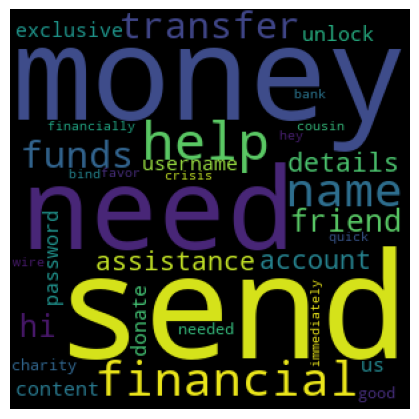

MESSAGE SPOOFING FOR PHISHING
click : 7
open : 5
shared : 4
message : 4
friend : 3
important : 3
read : 3
sent : 3
document : 3
coworker : 2
trusted : 2
family : 2
member : 2
colleague : 2
view : 2
link : 2
attachment : 2
photo : 1
see : 1
update : 1
manager : 1
urgent : 1
voicemail : 1
source : 1
listen : 1
file : 1
received : 1
service : 1
provider : 1
verify : 1
account : 1
secure : 1
bank : 1
log : 1
video : 1
contact : 1
boss : 1
access : 1


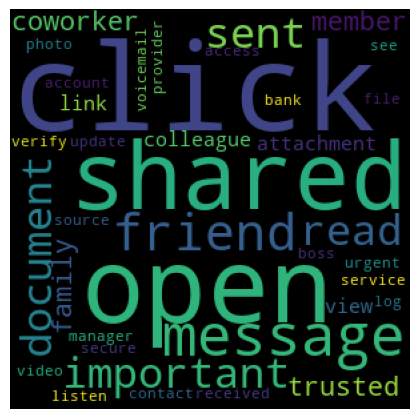

In [76]:
for i in attack_keys:
    tempset=set()
    dftemp=df[df.attack==i]
    for j in range(len(dftemp)):
        tempset.add(dftemp.iloc[j,1])
    cleanedinputs=[]# stores the cleaned data
    for j in tempset:
        temp=small(j)
        temp=cleaning_numbers(temp)
        temp=cleaning_contractions(temp)
        temp=cleaning_punctuations(temp)
        temp=cleaning_stopwords(temp)
        if temp!="":
            cleanedinputs.append(temp)
        
    words=[]
    for j in cleanedinputs:
        words.extend(j.split())
    wordcount=Counter(words) #counting occurance of each word using counter class
    wordcount=dict(wordcount)
    wordcount=dict(sorted(wordcount.items(),key=lambda x: x[1], reverse=True))
    
    attackwords[i]=wordcount #building the dictionary
    print(i.upper())
    for k,v in wordcount.items():
        print(k,":",v)
    words = " ".join(words)+ " "
    wordcloud = WordCloud(width = 300, height = 300,background_color ='black',min_font_size = 10).generate(words)
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [77]:
print(attackwords)

{'phishing': {'account': 11, 'information': 5, 'verify': 4, 'click': 4, 'log': 3, 'confirm': 3, 'update': 3, 'please': 3, 'immediate': 2, 'action': 2, 'required': 2, 'login': 2, 'prize': 2, 'personal': 2, 'suspicious': 2, 'urgent': 2, 'suspended': 1, 'details': 1, 'compromise': 1, 'alert': 1, 'secure': 1, 'data': 1, 'status': 1, 'jeopardy': 1, 'session': 1, 'expired': 1, 'review': 1, 'important': 1, 'security': 1, 'access': 1, 'clicking': 1, 'link': 1, 'email': 1, 'risk': 1, 'prevent': 1, 'lockout': 1, 'activity': 1, 'detected': 1, 'unlock': 1, 'confirming': 1, 'credentials': 1, 'needs': 1, 'attention': 1, 'resolve': 1, 'immediately': 1, 'congratulations': 1, 'claim': 1, 'verification': 1, 'proceed': 1, 'attempt': 1, 'identity': 1, 'selected': 1, 'exclusive': 1, 'offer': 1, 'act': 1, 'message': 1, 'bank': 1}, 'Spear Phishing': {'please': 10, 'reply': 4, 'financial': 3, 'update': 3, 'confirm': 3, 'sensitive': 3, 'needed': 2, 'project': 2, 'acknowledge': 2, 'receipt': 2, 'document': 2, '